In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

## Question 3 from the book

In [2]:
X1 = np.array([3, 2, 4, 1, 2, 4, 4])
X2 = np.array([4, 2, 4, 4, 1, 3, 1])
Y = np.array([1, 1, 1, 1, -1, -1, -1])

In [3]:
model = LinearSVC(C=1e10)
model.fit(np.c_[X1, X2], Y)
W, b = model.coef_[0], model.intercept_

In [19]:
def plot_decision_boundery(W, b, range=[0, 5]):
    x = np.linspace(range[0], range[1], 100)
    y = - (b + W[0] * x) / W[1]
    plt.plot(x, y)

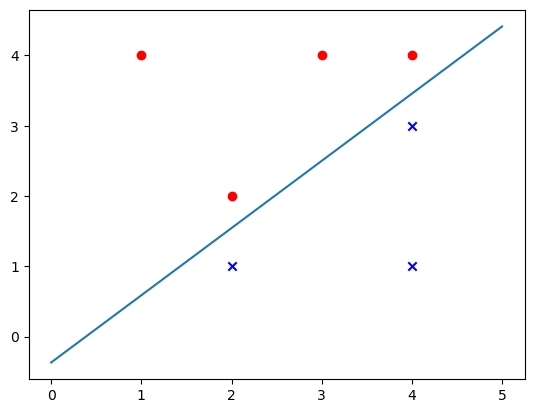

In [5]:
plt.scatter(X1[:4], X2[:4], c='r', marker='o')
plt.scatter(X1[4:], X2[4:], c='b', marker='x')
plot_decision_boundery(W, b)
plt.show()

In [6]:
W, b

(array([-2.09547062,  2.19094124]), array([0.80905876]))

In [7]:
def predict(x1, x2):
    return np.sign(W[0] * x1 + W[1] * x2 + b)

In [8]:
predict(1, 4), predict(4, 1)

(array([1.]), array([-1.]))

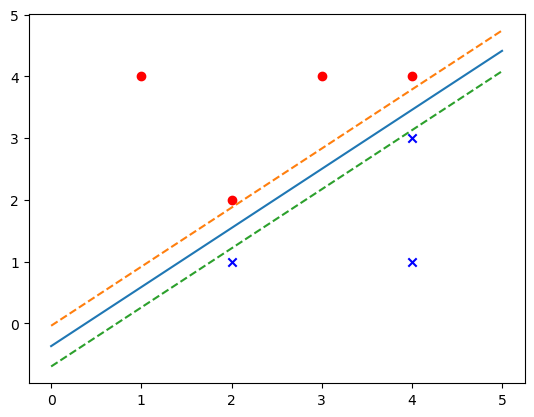

In [9]:
def plot_margins(W, b):
    x = np.linspace(0, 5, 100)
    y = - (b + W[0] * x) / W[1]
    margin = 1 / np.linalg.norm(W)
    y_margin1 = y + margin
    y_margin2 = y - margin
    plt.plot(x, y, '-')
    plt.plot(x, y_margin1, '--')
    plt.plot(x, y_margin2, '--')

plt.scatter(X1[:4], X2[:4], c='r', marker='o')
plt.scatter(X1[4:], X2[4:], c='b', marker='x')
plot_margins(W, b)
plt.show()

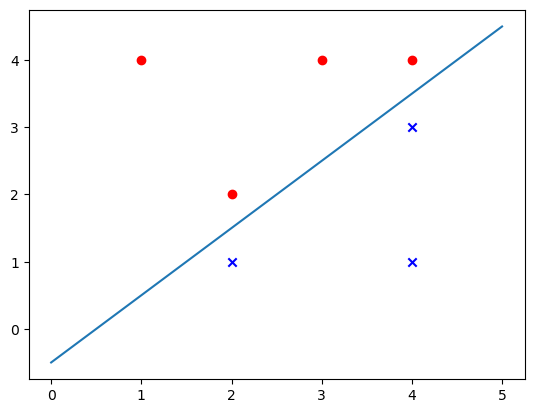

In [10]:
plt.scatter(X1[:4], X2[:4], c='r', marker='o')
plt.scatter(X1[4:], X2[4:], c='b', marker='x')
x = np.linspace(0, 5, 100)
y = x - 0.5
plt.plot(x, y, '-')
plt.show()

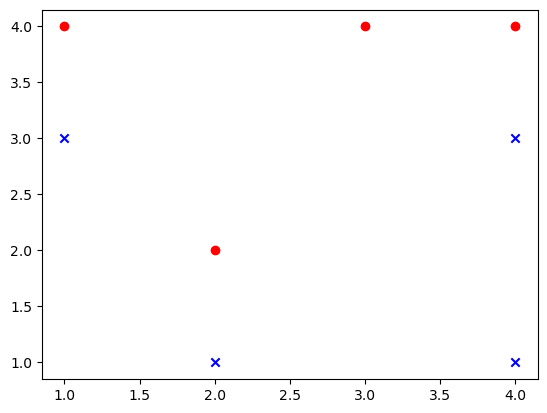

In [11]:
X1 = np.append(X1, [1])
X2 = np.append(X2, [3])
Y = np.append(Y, [-1])
plt.scatter(X1[:4], X2[:4], c='r', marker='o')
plt.scatter(X1[4:], X2[4:], c='b', marker='x')

In [12]:

model.fit(np.c_[X1, X2], Y)
W, b = model.coef_[0], model.intercept_
W,b

(array([-0.05147059,  0.51838235]), array([-1.29044118]))

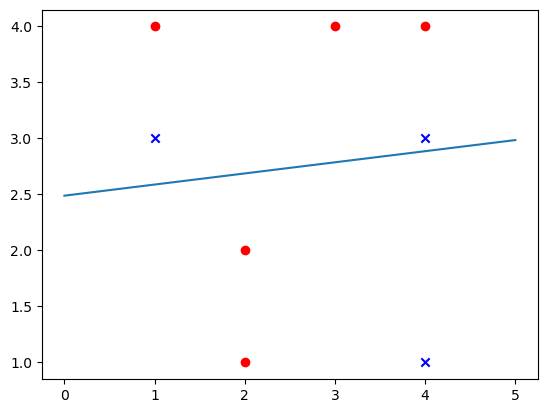

In [13]:
plt.scatter(X1[:5], X2[:5], c='r', marker='o')
plt.scatter(X1[5:], X2[5:], c='b', marker='x')
plot_decision_boundery(W, b)

## Question 6

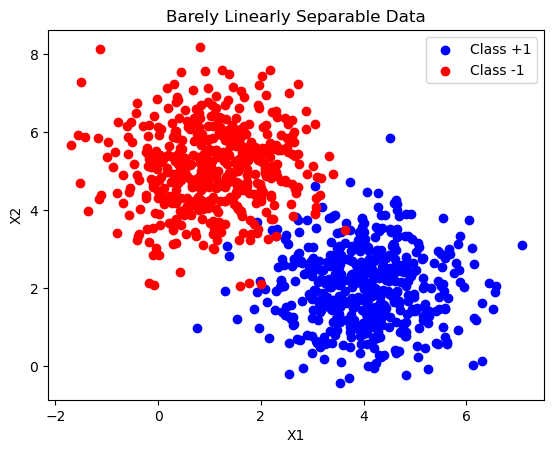

In [16]:
np.random.seed(42)
n_points = 500
class1 = np.random.multivariate_normal(mean=[4, 2], cov=[[1, 0], [0, 1]], size=n_points)
class2 = np.random.multivariate_normal(mean=[1, 5], cov=[[1, 0], [0, 1]], size=n_points)
y_class1 = np.ones(n_points)
y_class2 = -np.ones(n_points)
X = np.vstack((class1, class2))
y = np.hstack((y_class1, y_class2))
plt.scatter(class1[:, 0], class1[:, 1], color='blue', label='Class +1')
plt.scatter(class2[:, 0], class2[:, 1], color='red', label='Class -1')
plt.title("Barely Linearly Separable Data")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()

Best parameters: {'C': 0.1}


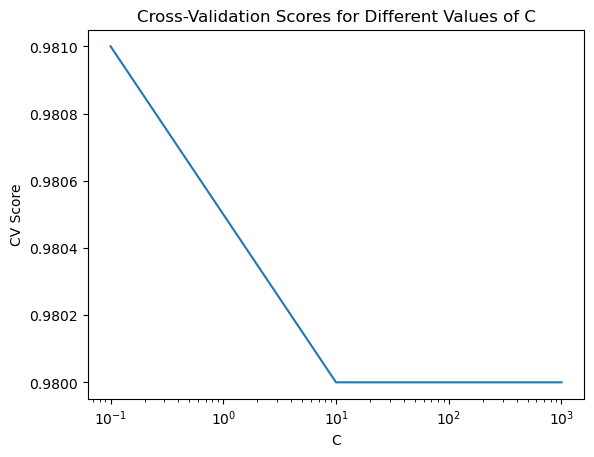

In [17]:
param_grid = {'C': [0.1, 10, 100, 1000]}
linear_svc = LinearSVC()
grid_search = GridSearchCV(linear_svc, param_grid, cv=5)
grid_search.fit(X, y)
print("Best parameters:", grid_search.best_params_)
plt.plot(param_grid['C'], grid_search.cv_results_['mean_test_score'])
plt.xlabel('C')
plt.ylabel('CV Score')
plt.title('Cross-Validation Scores for Different Values of C')
plt.xscale('log')
plt.show()

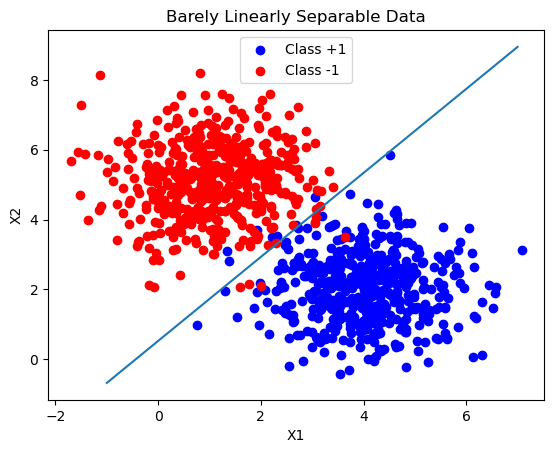

In [21]:
plt.scatter(class1[:, 0], class1[:, 1], color='blue', label='Class +1')
plt.scatter(class2[:, 0], class2[:, 1], color='red', label='Class -1')
plot_decision_boundery(grid_search.best_estimator_.coef_[0], grid_search.best_estimator_.intercept_, [-1, 7])
plt.title("Barely Linearly Separable Data")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()